In [2]:
# Importing the libraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer as TfidV
from sklearn.metrics.pairwise import linear_kernel as LK

In [9]:
data = pd.read_csv(r"C:\Users\POOJITH REDDY M\Desktop\klu\sem3\PA\data set\listing.csv", usecols = ['id', 'name', 'description','neighbourhood_group'])
data.head(10)

,id,name,description
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...
1,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart..."
2,5121,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...
3,45910,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish..."
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...
5,45935,Room in Beautiful Townhouse.,Single bedroom available in 3 bedroom apartmen...
6,77765,Superior @ Box House,<b>The space</b><br />Charming standard queen ...
7,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...
8,80493,Cozy room in East Village with AC,This room is up three flights of stairs - it's...
9,80684,Duplex w/ Terrace @ Box House Hotel,This Duplex Loft Suite with a Terrace offers a...


In [10]:
data['name'] = data['name'].astype('str')
data['description'] = data['description'].astype('str')

In [11]:
name_corpus = ' '.join(data['name'])
description_corpus = ' '.join(data['description'])

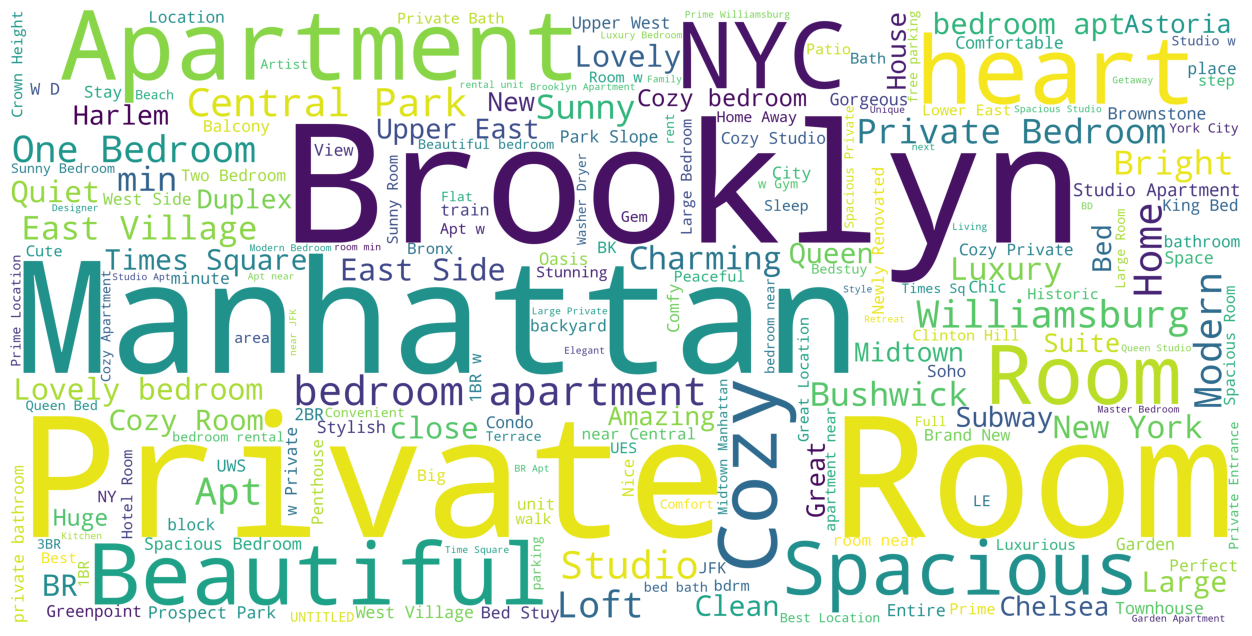

In [12]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

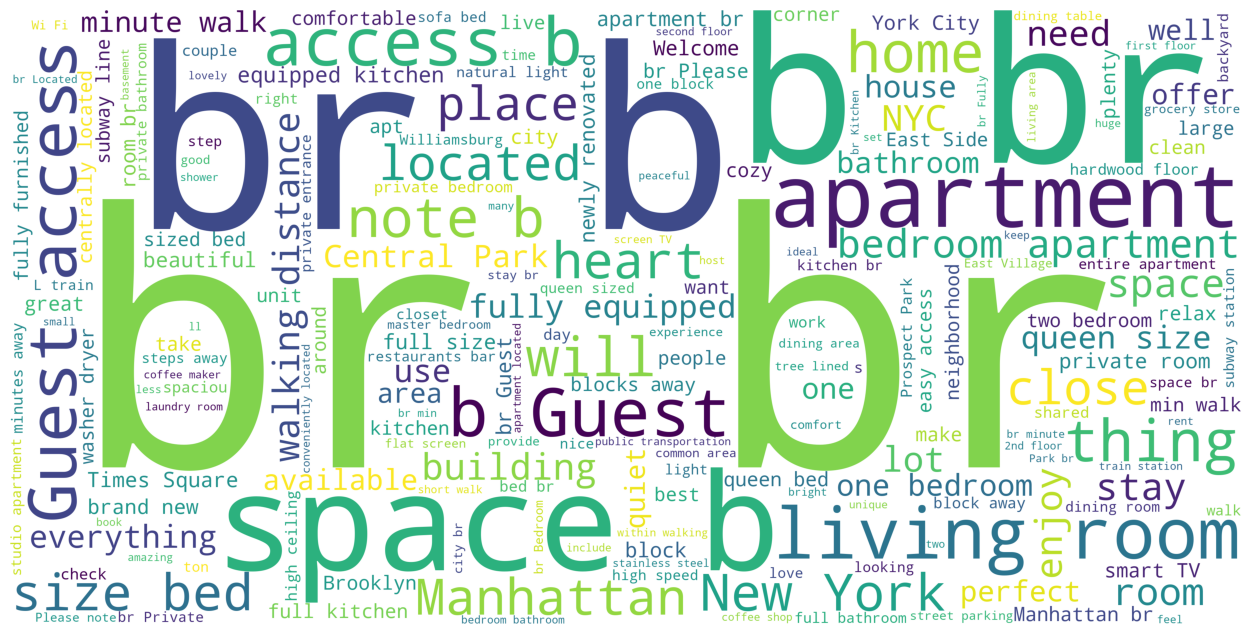

In [13]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [14]:
data['content'] = data[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [15]:
data['content'].fillna('Null', inplace = True)

In [16]:
tf = TfidV(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(data['content'])

In [18]:
cosine_similarities = LK(tfidf_matrix, tfidf_matrix)

In [19]:
results = {}
for idx, row in data.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], data['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [20]:
def item(id):
    name   = data.loc[data['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + data.loc[data['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [23]:
recommend(item_id = 45910, num = 6)

Recommending 6 products similar to Beautiful Queens Brownstone! - 5BR 
Description: <b>The space</b><br />Beautiful, fully furnished and equipped, brownstone for short term rental. Great for NYC interns, families on holiday, groups. <br /><br />Full...
---

Recommended: ★LOVELY UPPER EAST SIDE STUDIO - CENTRAL PARK★ 
Description: Kick back and relax in this calm, stylish space with all necessary amenities.  Unbeatable location near Q, 6 train line, few minutes by walk to the Central Park and ...
(score:0.1185254366701079)

Recommended: CUTE STUDIO ON UPPER EAST SIDE @ CENTRAL PARK 
Description: Charming, stylish and fully furnished studio apartment with all necessary amenities. Unbeatable location near Q, 6 train line, few minutes by walk to the  Central Pa...
(score:0.1169743688793717)

Recommended: QUIET OASIS IN THE MIDDLE OF MANHATTAN NYC 
Description: Charming, stylish and fully furnished studio apartment with all necessary amenities. Unbeatable location near Q, 6 train line, few 